In [ ]:
!pip install kaggle -q

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
import json
import zipfile

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

**Data Collection From Kaggle**

In [ ]:
kaggle_config=json.load(open('kaggle.json'))

*Set Environment variables*

In [ ]:
os.environ['KAGGLE_USERNAME']=kaggle_config['username']
os.environ['KAGGLE_KEY']=kaggle_config['key']

In [ ]:
# loading the dataset using kaggle API
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
spotify-million-song-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
with zipfile.ZipFile('spotify-million-song-dataset.zip','r') as zip_ref:
    zip_ref.extractall()

**Load Data**

In [ ]:
df=pd.read_csv('/content/spotify_millsongdata.csv')
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
df['text'][0]

"Look at her face, it's a wonderful face  \r\nAnd it means something special to me  \r\nLook at the way that she smiles when she sees me  \r\nHow lucky can one fellow be?  \r\n  \r\nShe's just my kind of girl, she makes me feel fine  \r\nWho could ever believe that she could be mine?  \r\nShe's just my kind of girl, without her I'm blue  \r\nAnd if she ever leaves me what could I do, what could I do?  \r\n  \r\nAnd when we go for a walk in the park  \r\nAnd she holds me and squeezes my hand  \r\nWe'll go on walking for hours and talking  \r\nAbout all the things that we plan  \r\n  \r\nShe's just my kind of girl, she makes me feel fine  \r\nWho could ever believe that she could be mine?  \r\nShe's just my kind of girl, without her I'm blue  \r\nAnd if she ever leaves me what could I do, what could I do?\r\n\r\n"

In [ ]:
df.shape

(57650, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [ ]:
# checkings null value
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [ ]:
df.duplicated().sum()

np.int64(0)

**Top 10 Artist**

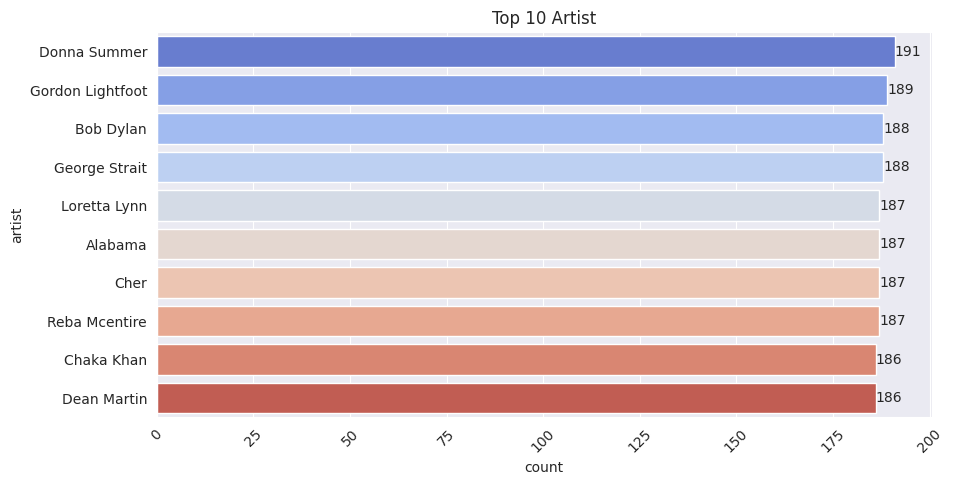

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
top_10=df['artist'].value_counts().head(10).reset_index()
top_10.columns=['artist','count']
ax=sns.barplot(data=top_10,x='count',y='artist',palette="coolwarm")
for i in ax.containers:
    ax.bar_label(i)
plt.title('Top 10 Artist')
plt.xticks(rotation=45)
plt.show()

*taking 20k songs for our App*

In [ ]:
df=df.sample(20000)
df.head()

In [ ]:
df=df.drop('link',axis=1).reset_index(drop=True)

In [ ]:
df.shape

(20000, 3)

In [ ]:
df.head()

,artist,song,text
0,Snoop Dogg,Hourglass,[Snoop Dogg] \r\nAw yeah \r\nThis one goes o...
1,Marilyn Manson,The Fall Of Adam,The Abraham Lincoln town cars \r\nArrive to d...
2,Conway Twitty,For Heaven's Sake,We thought the baby was the answer to keep us ...
3,Barbra Streisand,Come Back To Me,"Hear my voice where you are \r\nTake a train,..."
4,Green Day,East Jesus Nowhere,Raise your hands now to testify \r\nYour conf...


**Visulizing Most Common Word**

In [ ]:
all_songs=" ".join(df['text'].dropna())

In [ ]:
worldcloud=WordCloud(width=800,height=500,background_color='white')

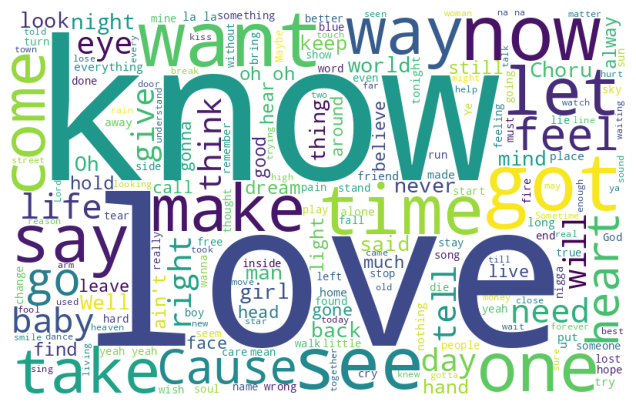

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(worldcloud.generate(all_songs))
plt.axis('off')
plt.show()

*Data Preprocessing*

In [ ]:
# download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words=set(stopwords.words('english'))

In [ ]:
def preprocess_lyrics(lyrics):
  text=re.sub(r"[^a-zA-Z\s]","",lyrics)

  text=text.lower()

  tokens=word_tokenize(text)
  tokens=[word for word in tokens if word not in stop_words]

  return " ".join(tokens)

In [81]:
df['text'][0]

"[Snoop Dogg]  \r\nAw yeah  \r\nThis one goes out to all you motherfuckers out there  \r\nThat didn't think we could make records that could bang in the club  \r\nYa that's right  \r\nAll you ladies out there with the big butts  \r\nWith the long hair, the big titties, the pretty eyes  \r\nReport to the dance floor right about now  \r\n  \r\n[Snoop Dogg]  \r\nWiggle it round see'mon down  \r\nDoggy-d-o-double's in town  \r\nI know you want to get down  \r\nSo why you lookin' at me like that  \r\nBitch break that shit down  \r\nI want to make your kitty cat growl  \r\nI want to hit it get it right now  \r\nSo what you playin' with it for  \r\nBack it up slow move it around and dance to the flow  \r\nNow put your hands on the floor (c'mon)  \r\nSee'mon on and gimme some more  \r\nIt's crazy but baby that maybe we gonna fuck in a man's mercedes  \r\nBitch I ain't that loco  \r\nFuckin' with a broke hoe  \r\nGet a nigga smoked tho, no-no, na-na, nae-nae  \r\nShe got a whole bunch of kids l

In [82]:
df['text']=df['text'].apply(preprocess_lyrics)

In [83]:
df['text'][0]

'snoop dogg aw yeah one goes motherfuckers didnt think could make records could bang club ya thats right ladies big butts long hair big titties pretty eyes report dance floor right snoop dogg wiggle round seemon doggydodoubles town know want get lookin like bitch break shit want make kitty cat growl want hit get right playin back slow move around dance flow put hands floor cmon seemon gim crazy baby maybe gon na fuck mans mercedes bitch aint loco fuckin broke hoe get nigga smoked tho nono nana naenae got whole bunch kids like baby listen pimper say goldie loc want want hump thats want want want hump thats want mr kane slap bitches face give em jayz lips make sign life pay chips cut hoes much sell band aids give bitches sandwiches handmade mayonnaise put bitches stroll hall plus control hoes like remote control suped remote controlled cars code blow hoe em like internet got dick neck aint even took dinner yet fuck aint taken dinner ill bring diner get behind go fuckin losers im winner i

In [84]:
tfidf_vectorizer=TfidfVectorizer(max_features=5000)
tfidf_matrix=tfidf_vectorizer.fit_transform(df['text'])
print(tfidf_matrix.shape)

(20000, 5000)


In [85]:
tfidf_vectorizer.vocabulary_.__len__()

5000

In [86]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

**Recommendation System**

In [134]:
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]


In [135]:
recommend_songs("American Dream")

,artist,song
11346,Snoop Dogg,I Love My Momma
9614,Bette Midler,If Momma Was Married
14071,Alison Krauss,Momma Cried
8660,Kelly Family,Our Mommas !
18550,Ocean Colour Scene,Huckleberry Grove


In [138]:
recommend_songs("He Was Mine")

,artist,song
7173,The Beatles,I Me Mine
13878,John Waite,When You Were Mine
6174,Jennifer Lopez,Pleasure Is Mine
380,Keith Urban,She's My 11
13785,Drake,What If I Kissed You


In [141]:
recommend_songs("Need Your Love")

,artist,song
6588,Oasis,All You Need Is Love
12596,One Direction,All You Need Is Love
8461,Cheap Trick,Need Your Love
2509,Ian Hunter,I Need Your Love
19652,Kiss,Do You Love Me


In [142]:
import pickle
with open('music.pkl', 'wb') as file:
    pickle.dump((df, cosine_sim), file)
print("Saved Succesfully")

Saved Succesfully




---



---



---



---



---

Z.I. Turjo